<a href="https://colab.research.google.com/github/Brahim2000/Data-mining--Vehicle-collision/blob/main/Copie_de_vehicles_collision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table des Matières
1. [Section 1: Introduction](#section-1)

2. [Section 2: Dataset](#section-2)

3. [Section 3: Importation des données](#section-3)

4. [Section 4: Visualisations](#section-4)

5. [Section 5: Prétraitement](#section-5)
    
     5.1. [Nettoyage des données](#section-5-1)

     5.2.  [Transformation de données](#section-2-2)

     5.3. [Réduction de données](#section-5-3)

6. [Section 6: Modèle](#section-6)

    6.1. [Decison Tree](#section-6-1)

    6.2. [Logistic Regression ](#section-6-2)

    6.3. [Ensemble Learning](#section-6-3)

7. [Section 7: Explicabilité](#section-7)

    7.1. [Lime](#section-7-1)

    7.2. [Shap](#section-7-2)
  

# Section 1: Introduction <a name="section-1"></a>

> Bloc en retrait




Nous allons traiter le problème de la sécurité routière à New York, en
particulier les accidents liés aux collisions de véhicules automobiles.

L'objectif
est d'analyser les données pour comprendre les tendances, les facteurs
contributifs et les risques associés aux accidents de la route, en vue de
réduire les accidents graves et les décès

# Section 2: Dataset <a name="section-2"></a>

Les données sur lesquelles nous allons travailler proviennent des rapports
de police (MV104-AN) remplis pour toutes les collisions de véhicules à moteur
signalées par la police à New York. Ces données contiennent des
informations détaillées sur chaque événement de crash, y compris les lieux,
les circonstances, les véhicules impliqués, les blessures subies, et d'autres
informations pertinentes.

Ces données sont collectées électroniquement
depuis mars 2016 et stockées dans le système de gestion des dossiers en
ligne Finest (FORMS). Elles sont disponibles pour des analyses plus
détaillées de la sécurité routière.

**Lien vers le dataset :** https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

# Section 3: Importation des données <a name="section-3"></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap
import lime
from lime import lime_tabular


In [ ]:
df = pd.read_csv("/content/vehiclecollisions.csv")
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
df.head()

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
df.shape

(77655, 29)

In [ ]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                         object
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED    float64
NUMBER OF PEDESTRIANS KILLED     float64
NUMBER OF CYCLIST INJURED        float64
NUMBER OF CYCLIST KILLED         float64
NUMBER OF MOTORIST INJURED       float64
NUMBER OF MOTORIST KILLED        float64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                     float64
VEHICLE TYPE COD

In [ ]:
missing_values = df.isnull().sum()

print("Colonnes avec des valeurs manquantes :\n", missing_values[missing_values > 0])

print("\nNombre total de valeurs manquantes par colonne :\n", missing_values.sum())

Colonnes avec des valeurs manquantes :
 BOROUGH                          26843
ZIP CODE                         26851
LATITUDE                          6080
LONGITUDE                         6080
LOCATION                          6081
ON STREET NAME                   21072
CROSS STREET NAME                41826
OFF STREET NAME                  56585
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        1
NUMBER OF PEDESTRIANS KILLED         1
NUMBER OF CYCLIST INJURED            1
NUMBER OF CYCLIST KILLED             1
NUMBER OF MOTORIST INJURED           1
NUMBER OF MOTORIST KILLED            1
CONTRIBUTING FACTOR VEHICLE 1      383
CONTRIBUTING FACTOR VEHICLE 2    17426
CONTRIBUTING FACTOR VEHICLE 3    69590
CONTRIBUTING FACTOR VEHICLE 4    75462
CONTRIBUTING FACTOR VEHICLE 5    76987
COLLISION_ID                         1
VEHICLE TYPE CODE 1                912
VEHICLE TYPE CODE 2              25649
VEHICLE TYPE CODE 3     

In [ ]:
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], errors='coerce').astype('Int64')
df['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], errors='coerce').astype('Int64')
df['NUMBER OF PEDESTRIANS INJURED'] = pd.to_numeric(df['NUMBER OF PEDESTRIANS INJURED'], errors='coerce').astype('Int64')
df['NUMBER OF PEDESTRIANS KILLED'] = pd.to_numeric(df['NUMBER OF PEDESTRIANS KILLED'], errors='coerce').astype('Int64')
df['NUMBER OF CYCLIST INJURED'] = pd.to_numeric(df['NUMBER OF CYCLIST INJURED'], errors='coerce').astype('Int64')
df['NUMBER OF CYCLIST KILLED'] = pd.to_numeric(df['NUMBER OF CYCLIST KILLED'], errors='coerce').astype('Int64')
df['NUMBER OF MOTORIST KILLED'] = pd.to_numeric(df['NUMBER OF MOTORIST KILLED'], errors='coerce').astype('Int64')
df['NUMBER OF MOTORIST INJURED'] = pd.to_numeric(df['NUMBER OF MOTORIST INJURED'], errors='coerce').astype('Int64')
df['COLLISION_ID'] = pd.to_numeric(df['COLLISION_ID'], errors='coerce').astype('Int64')

df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Section 4: Visualisations <a name="section-4"></a>



In [ ]:
borough = df['BOROUGH'].value_counts()

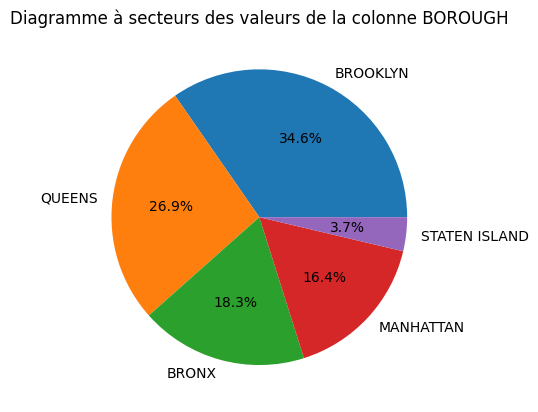

In [ ]:
borough.plot(kind='pie', autopct='%1.1f%%')

# Ajouter un titre
plt.title('Diagramme à secteurs des valeurs de la colonne BOROUGH')
plt.ylabel('')
# Afficher le graphique
plt.show()

In [ ]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,09:35:00,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
hc = df['CRASH TIME'].apply(lambda x: x.hour).value_counts()
hc

16    5028
17    4950
15    4732
14    4630
18    4414
13    3929
12    3850
19    3830
8     3729
0     3631
11    3567
20    3329
9     3329
10    3268
21    3089
22    3000
23    2750
7     2544
6     2024
1     1965
2     1629
5     1550
4     1494
3     1394
Name: CRASH TIME, dtype: int64

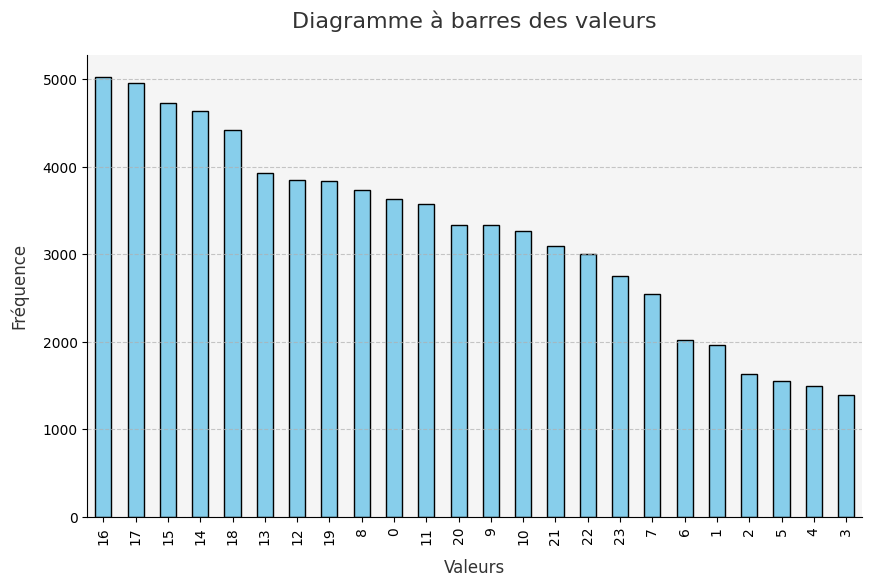

In [ ]:
import matplotlib.pyplot as plt

# Assumez que 'hc' est votre DataFrame avec les données

# Créer le diagramme à barres avec un style amélioré
ax = hc.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))

# Ajouter des étiquettes et un titre avec un style amélioré
plt.xlabel('Valeurs', fontsize=12, labelpad=10, color='#333333')
plt.ylabel('Fréquence', fontsize=12, labelpad=10, color='#333333')
plt.title('Diagramme à barres des valeurs', fontsize=16, pad=20, color='#333333')

# Ajouter une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Supprimer la bordure du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajouter un fond gris clair pour améliorer la lisibilité des étiquettes
ax.set_facecolor('#f5f5f5')

# Afficher le graphique
plt.show()


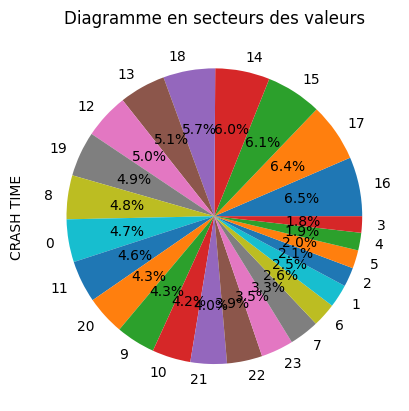

In [ ]:

# Afficher les résultats sous forme de diagramme en secteurs
hc.plot(kind='pie', autopct='%1.1f%%')

# Ajouter un titre
plt.title('Diagramme en secteurs des valeurs')

# Afficher le graphique
plt.show()



On remarque que le nombre d'accidents est bas entre 1h et 7h du matin comparé aux heures de journées.
Néanmoins, le taux d'accidents dans les heures de nuits est élevé vu la différence de la fréquence de circulation entre les heures de jours et les heures de nuits.

- df1 contient les accidents entre 1h et 7h pour voir quels sont les facteurs qui contribient aux accidents de nuit

In [ ]:
df1 = df[(df['CRASH TIME'].apply(lambda x: x.hour)>=1) & (df['CRASH TIME'].apply(lambda x: x.hour)<=7)]
df1.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
2,06/29/2022,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
17,12/14/2021,01:28:00,NaN,NaN,NaN,NaN,NaN,MEEKER AVENUE,LORIMER STREET,NaN,3,0,0,0,0,0,3,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,4486284,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
20,12/11/2021,04:45:00,MANHATTAN,10001.0,40.748917,-73.993546,"(40.748917, -73.993546)",NaN,NaN,232 WEST 30 STREET,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4486905,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
21,12/14/2021,05:46:00,NaN,NaN,40.744644,-73.77041,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN,NaN,1,0,0,0,0,0,1,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,4487122,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [ ]:
contributing_factor_columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                               'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                               'CONTRIBUTING FACTOR VEHICLE 5']

# Initialize an empty dictionary to store counts
factor_counts = {}

# Iterate over contributing factor columns
for column in contributing_factor_columns:
    # Flatten the column values and count occurrences
    factor_counts[column] = df1[column].explode().value_counts()

# Combine counts from all columns
combined_counts = pd.concat(factor_counts.values(), axis=1, keys=factor_counts.keys())

# Fill NaN values with 0
combined_counts = combined_counts.fillna(0)

# Sum the counts across columns to get the total count for each factor
combined_counts['Total'] = combined_counts.sum(axis=1)

# Display the result
print(combined_counts)

                                                    CONTRIBUTING FACTOR VEHICLE 1  \
Unspecified                                                                  2926   
Driver Inattention/Distraction                                               2845   
Unsafe Speed                                                                  800   
Following Too Closely                                                         652   
Failure to Yield Right-of-Way                                                 517   
Passing or Lane Usage Improper                                                503   
Alcohol Involvement                                                           503   
Traffic Control Disregarded                                                   481   
Other Vehicular                                                               373   
Passing Too Closely                                                           348   
Backing Unsafely                                                 

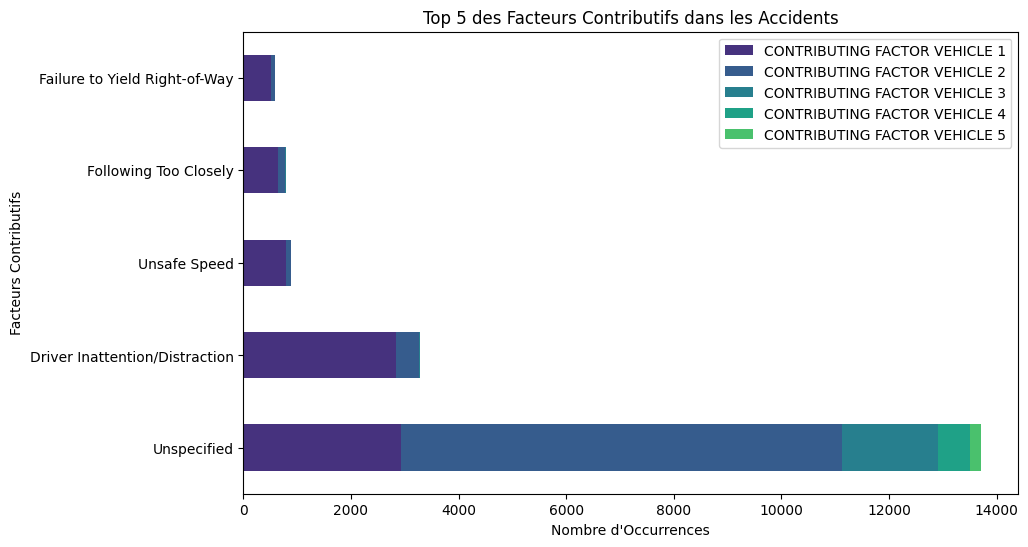

In [ ]:
combined_counts_sorted = combined_counts.sort_values(by='Total', ascending=False)

# Sélectionner les 10 premiers facteurs pour une meilleure lisibilité
top_factors = combined_counts_sorted.head(5)

# Tracer un graphique à barres horizontales avec des couleurs distinctes
colors = sns.color_palette('viridis', len(top_factors.columns))
top_factors.drop('Total', axis=1).plot(kind='barh', stacked=True, color=colors, figsize=(10, 6))

# Ajouter des étiquettes et un titre
plt.xlabel('Nombre d\'Occurrences')
plt.ylabel('Facteurs Contributifs')
plt.title('Top 5 des Facteurs Contributifs dans les Accidents')

# Afficher le graphique
plt.show()


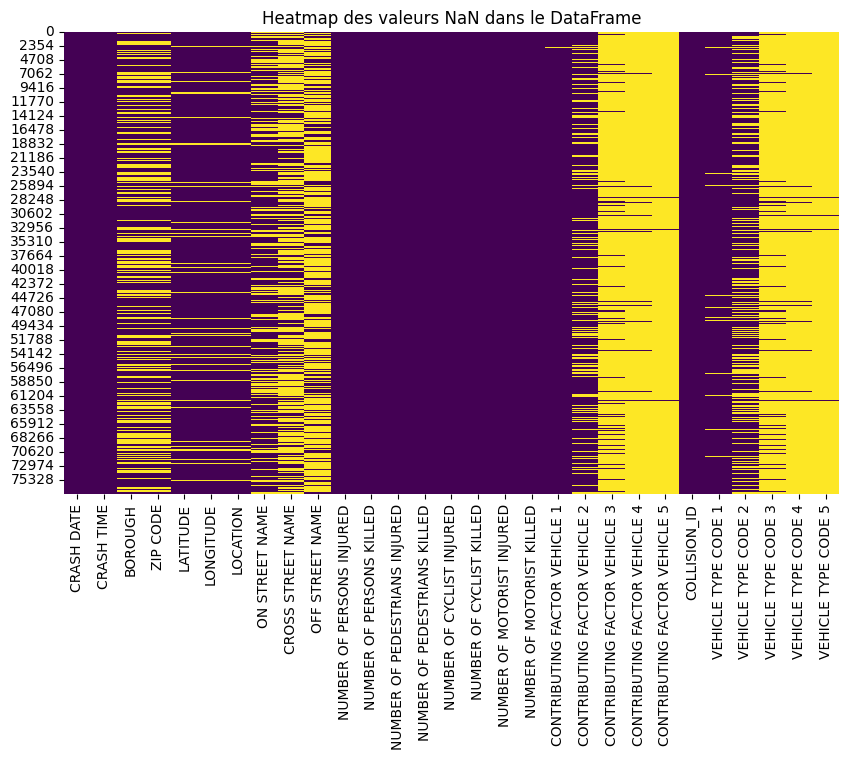

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

# Ajouter un titre
plt.title('Heatmap des valeurs NaN dans le DataFrame')

# Afficher la heatmap
plt.show()

# Section 5: Prétraitement <a name="section-5"></a>

## Nettoyage des données <a name="section-5-1"></a>


- Traitement des données manquantes

In [ ]:
attributs_a_traiter = ['BOROUGH','ZIP CODE','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']

for attribut in attributs_a_traiter:
    df[attribut] = df[attribut].fillna(value='Unknown')



In [ ]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')

moyenne = df['LATITUDE'].mean(skipna=True)
df['LATITUDE'].fillna(moyenne, inplace=True)
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])

In [ ]:
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')


moyenne_longitude = df['LONGITUDE'].mean(skipna=True)

# Remplacez les NaN par la moyenne
df['LONGITUDE'].fillna(moyenne_longitude, inplace=True)

df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,Unknown,Unknown,40.516775,-73.539080,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,Unknown,Unknown,Unknown,4455765,Sedan,Sedan,Unknown,Unknown,Unknown
1,2022-03-26,11:45:00,Unknown,Unknown,40.516775,-73.539080,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,Unknown,Unknown,Unknown,Unknown,4513547,Sedan,Unknown,Unknown,Unknown,Unknown
2,2022-06-29,06:55:00,Unknown,Unknown,40.516775,-73.539080,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unknown,Unknown,Unknown,4541903,Sedan,Pick-up Truck,Unknown,Unknown,Unknown
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unknown,Unknown,Unknown,Unknown,4456314,Sedan,Unknown,Unknown,Unknown,Unknown
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,4486609,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
month_counts = df['CRASH DATE'].dt.month.value_counts()
month_counts

6     11617
7     11511
5     10294
4      8761
10     8373
9      7025
1      6273
12     5593
8      4873
3      2161
2       661
11      513
Name: CRASH DATE, dtype: int64

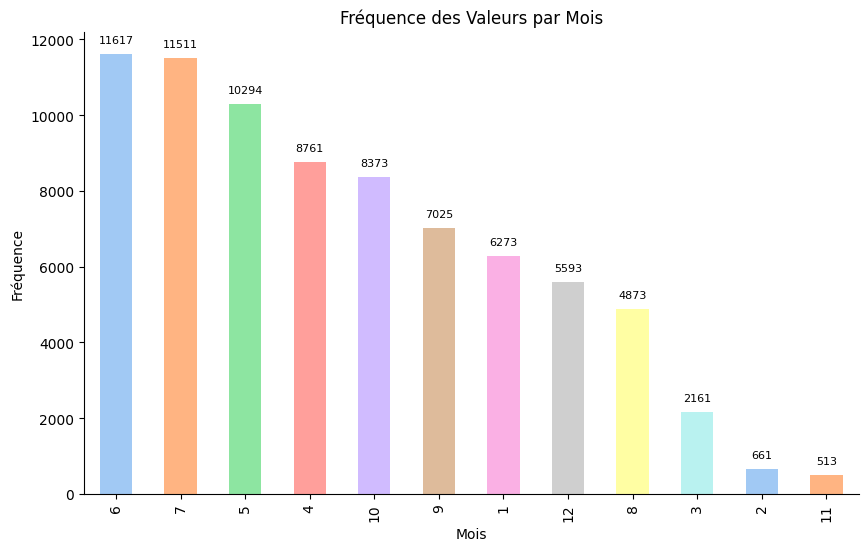

In [ ]:
colors = sns.color_palette("pastel")

ax = month_counts.plot(kind='bar', color=colors, figsize=(10, 6), legend=False)

plt.xlabel('Mois')
plt.ylabel('Fréquence')
plt.title('Fréquence des Valeurs par Mois')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
sns.despine()
ax.set_axisbelow(True)
plt.show()


## Tansformation de données <a name="section-5-2"></a>

- Normalisation

In [ ]:
min_lat = df['LATITUDE'].min()
max_lat = df['LATITUDE'].max()
df['LATITUDE'] = (df['LATITUDE'] - min_lat) / (max_lat - min_lat)

In [ ]:
min_lat = df['LONGITUDE'].min()
max_lat = df['LONGITUDE'].max()

# Appliquer la normalisation min-max
df['LONGITUDE'] = (df['LONGITUDE'] - min_lat) / (max_lat - min_lat)

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,Unknown,Unknown,0.990320,0.009599,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,Unknown,Unknown,Unknown,4455765,Sedan,Sedan,Unknown,Unknown,Unknown
1,2022-03-26,11:45:00,Unknown,Unknown,0.990320,0.009599,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,Unknown,Unknown,Unknown,Unknown,4513547,Sedan,Unknown,Unknown,Unknown,Unknown
2,2022-06-29,06:55:00,Unknown,Unknown,0.990320,0.009599,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unknown,Unknown,Unknown,4541903,Sedan,Pick-up Truck,Unknown,Unknown,Unknown
3,2021-09-11,09:35:00,BROOKLYN,11208.0,0.993996,0.005190,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unknown,Unknown,Unknown,Unknown,4456314,Sedan,Unknown,Unknown,Unknown,Unknown
4,2021-12-14,08:13:00,BROOKLYN,11233.0,0.994390,0.004506,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,4486609,Unknown,Unknown,Unknown,Unknown,Unknown


Encodge

In [ ]:
# Specify the columns you want to integer encode
columns_to_encode = ['CONTRIBUTING FACTOR VEHICLE 1' , 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']

# Create a dictionary to store the mapping of factors to integer values
factor_mapping = {}

for column in columns_to_encode:
    unique_factors = df[column].unique()

    # Check if a factor has been encountered before
    for factor in unique_factors:
        if factor not in factor_mapping:
            # Assign a new integer value to the factor
            factor_mapping[factor] = len(factor_mapping)

    # Map the factors to integer values in the DataFrame
    df[column] = df[column].map(factor_mapping)


In [ ]:
# Specify the columns you want to integer encode
columns_to_encode = ["VEHICLE TYPE CODE 1" ,	"VEHICLE TYPE CODE 2",	"VEHICLE TYPE CODE 3",	"VEHICLE TYPE CODE 4",	"VEHICLE TYPE CODE 5"]

# Create a dictionary to store the mapping of factors to integer values
factor_mapping = {}

for column in columns_to_encode:
    unique_factors = df[column].unique()

    # Check if a factor has been encountered before
    for factor in unique_factors:
        if factor not in factor_mapping:
            # Assign a new integer value to the factor
            factor_mapping[factor] = len(factor_mapping)

    # Map the factors to integer values in the DataFrame
    df[column] = df[column].map(factor_mapping)


In [ ]:
colonne_a_encoder = 'BOROUGH'

label_encoder = LabelEncoder()

df[colonne_a_encoder] = df[colonne_a_encoder].astype(str)


df[colonne_a_encoder] = df[colonne_a_encoder].replace('Unknown', '0')


df[colonne_a_encoder] = label_encoder.fit_transform(df[colonne_a_encoder])


In [ ]:
colonnes_a_encoder = ['ZIP CODE']

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Convertir toutes les valeurs des colonnes en chaînes de caractères
df[colonnes_a_encoder] = df[colonnes_a_encoder].astype(str)

# Remplacer les valeurs 'Unknown' par 0
df[colonnes_a_encoder] = df[colonnes_a_encoder].replace('Unknown', '0')

# Appliquer le label encoding sur chaque colonne
for colonne in colonnes_a_encoder:
    df[colonne] = label_encoder.fit_transform(df[colonne])

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,0,0,0.990320,0.009599,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,0,3,4,4,4,4455765,0,0,1,1,1
1,2022-03-26,11:45:00,0,0,0.990320,0.009599,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,1,4,4,4,4,4513547,0,1,1,1,1
2,2022-06-29,06:55:00,0,0,0.990320,0.009599,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,2,3,4,4,4,4541903,0,17,1,1,1
3,2021-09-11,09:35:00,2,114,0.993996,0.005190,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,3,4,4,4,4,4456314,0,1,1,1,1
4,2021-12-14,08:13:00,2,138,0.994390,0.004506,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,4,4,4,4,4,4486609,1,1,1,1,1


## Réduction de données <a name="section-5-3"></a>

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


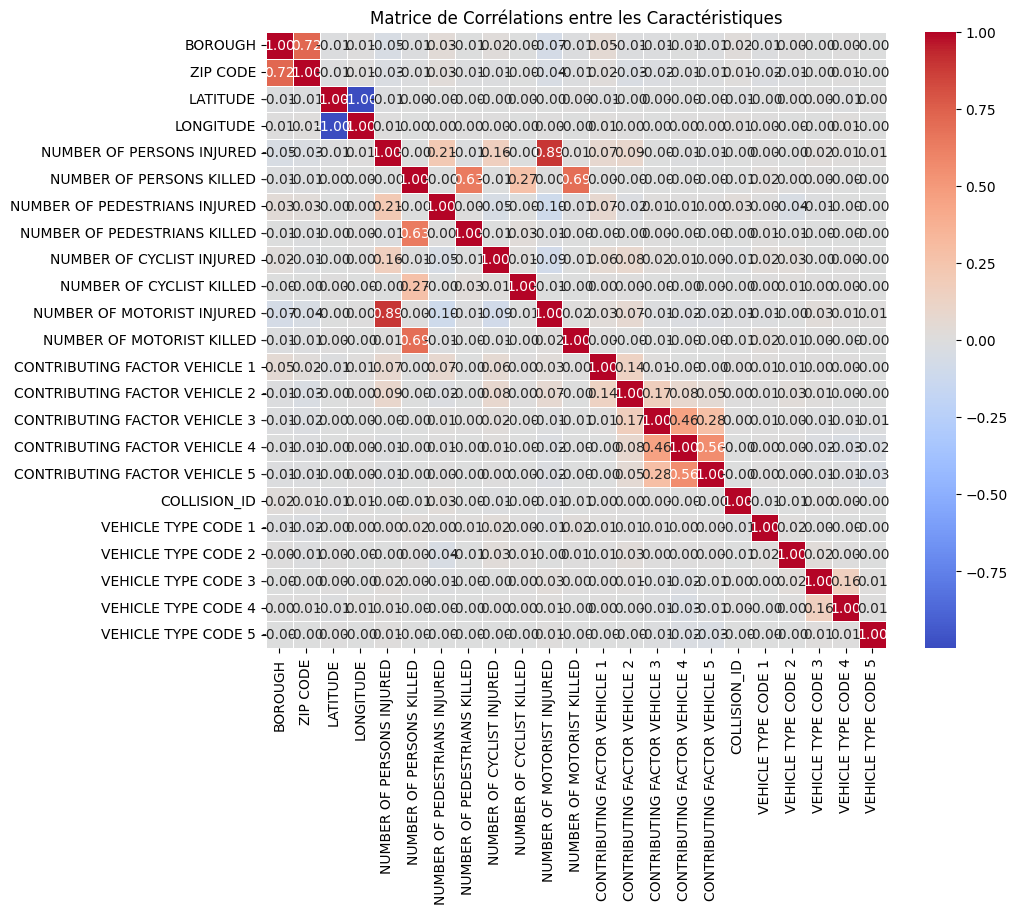

In [ ]:
# Calculer la matrice de corrélations
correlation_matrix  = df.corr()

# Afficher la matrice de corrélations sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélations entre les Caractéristiques")
plt.show()

In [ ]:

colonnes_a_supprimer = ['LOCATION', 'ON STREET NAME', 'COLLISION_ID' , 'CROSS STREET NAME','OFF STREET NAME','NUMBER OF PEDESTRIANS INJURED',	'NUMBER OF PEDESTRIANS KILLED',	'NUMBER OF CYCLIST INJURED',	'NUMBER OF CYCLIST KILLED',	'NUMBER OF MOTORIST INJURED',	'NUMBER OF MOTORIST KILLED']

df = df.drop(columns=colonnes_a_supprimer)


- Feature engineering

In [ ]:
df["Mortel"] = df["NUMBER OF PERSONS KILLED"]>0
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Mortel
0,2021-09-11,02:39:00,0,0,0.990320,0.009599,2,0,0,3,4,4,4,0,0,1,1,1,False
1,2022-03-26,11:45:00,0,0,0.990320,0.009599,1,0,1,4,4,4,4,0,1,1,1,1,False
2,2022-06-29,06:55:00,0,0,0.990320,0.009599,0,0,2,3,4,4,4,0,17,1,1,1,False
3,2021-09-11,09:35:00,2,114,0.993996,0.005190,0,0,3,4,4,4,4,0,1,1,1,1,False
4,2021-12-14,08:13:00,2,138,0.994390,0.004506,0,0,4,4,4,4,4,1,1,1,1,1,False


In [ ]:
df['injured'] = df['NUMBER OF PERSONS INJURED']>0

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Mortel,injured
0,2021-09-11,02:39:00,0,0,0.990320,0.009599,2,0,0,3,4,4,4,0,0,1,1,1,False,True
1,2022-03-26,11:45:00,0,0,0.990320,0.009599,1,0,1,4,4,4,4,0,1,1,1,1,False,True
2,2022-06-29,06:55:00,0,0,0.990320,0.009599,0,0,2,3,4,4,4,0,17,1,1,1,False,False
3,2021-09-11,09:35:00,2,114,0.993996,0.005190,0,0,3,4,4,4,4,0,1,1,1,1,False,False
4,2021-12-14,08:13:00,2,138,0.994390,0.004506,0,0,4,4,4,4,4,1,1,1,1,1,False,False


In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Month'] = df['CRASH DATE'].dt.month
df['Day'] =  df['CRASH DATE'].dt.dayofweek

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH DATETIME'] = df.apply(lambda row: pd.to_datetime(row['CRASH DATE'].strftime('%Y-%m-%d') + ' ' + str(row['CRASH TIME'])), axis=1)
df['Hour'] = df['CRASH DATETIME'].dt.hour
df['Minute'] = df['CRASH DATETIME'].dt.minute




In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Mortel,injured,Month,Day,CRASH DATETIME,Hour,Minute
0,2021-09-11,02:39:00,0,0,0.990320,0.009599,2,0,0,3,4,4,4,0,0,1,1,1,False,True,9,5,2021-09-11 02:39:00,2,39
1,2022-03-26,11:45:00,0,0,0.990320,0.009599,1,0,1,4,4,4,4,0,1,1,1,1,False,True,3,5,2022-03-26 11:45:00,11,45
2,2022-06-29,06:55:00,0,0,0.990320,0.009599,0,0,2,3,4,4,4,0,17,1,1,1,False,False,6,2,2022-06-29 06:55:00,6,55
3,2021-09-11,09:35:00,2,114,0.993996,0.005190,0,0,3,4,4,4,4,0,1,1,1,1,False,False,9,5,2021-09-11 09:35:00,9,35
4,2021-12-14,08:13:00,2,138,0.994390,0.004506,0,0,4,4,4,4,4,1,1,1,1,1,False,False,12,1,2021-12-14 08:13:00,8,13


In [ ]:
df = df.dropna(subset=['NUMBER OF PERSONS INJURED'])

In [ ]:
missing_values = df.isnull().sum()

print("Colonnes avec des valeurs manquantes :\n", missing_values[missing_values > 0])

print("\nNombre total de valeurs manquantes par colonne :\n", missing_values.sum())


Colonnes avec des valeurs manquantes :
 Series([], dtype: int64)

Nombre total de valeurs manquantes par colonne :
 0


In [ ]:
# Sauvegarder les données au format CSV (remplacez 'nom_du_fichier' par le nom que vous souhaitez donner au fichier)
df.to_csv('données_après_traitement.csv', index=False)

# Section 6: Modèle <a name="section-6"></a>

In [ ]:
features_a_selectionner = ['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'Day', 'Hour']
features = df[features_a_selectionner]
target_col = 'injured'
target = df[target_col]

## Decision Tree <a name="section-6-1"></a>

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Initialiser le modèle d'arbre de décision
modele_arbre_decision = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
modele_arbre_decision.fit(X_train, y_train)

# Prédire sur l'ensemble de test
predictions_arbre = modele_arbre_decision.predict(X_test)

In [ ]:
accuracy_arbre = accuracy_score(y_test, predictions_arbre)
conf_matrix = confusion_matrix(y_test, predictions_arbre)
class_report_arbre= classification_report(y_test, predictions_arbre)

# Afficher les résultats
print(f"Accuracy: {accuracy_arbre}")
print(f"Classification Report:\n{class_report_arbre}")

Accuracy: 0.6453544523855514
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      9993
         1.0       0.50      0.51      0.51      5538

    accuracy                           0.65     15531
   macro avg       0.61      0.61      0.61     15531
weighted avg       0.65      0.65      0.65     15531



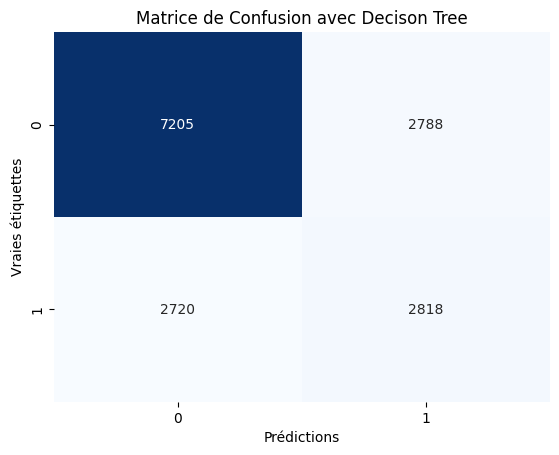

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion avec Decison Tree')
plt.show()


## Logistic Regression <a name="section-6-2"></a>

In [ ]:
# Create a logistic regression model
logreg_model = LogisticRegression(solver='liblinear')

# Train the model on the training data
logreg_model.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [ ]:

predictions_logistic = logreg_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
conf_matrix = confusion_matrix(y_test, predictions_logistic)
class_report_logistic = classification_report(y_test, predictions_logistic)

# Display the results
print(f"Accuracy: {accuracy_logistic}")
print(f"Classification Report:\n{class_report_logistic}")

Accuracy: 0.6452256776769043
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.96      0.78      9993
         1.0       0.52      0.08      0.14      5538

    accuracy                           0.65     15531
   macro avg       0.58      0.52      0.46     15531
weighted avg       0.60      0.65      0.55     15531



## Ensemble Learning <a name="section-6-3"></a>

RandomForest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
predictions_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix = confusion_matrix(y_test, predictions_rf)
class_report_rf = classification_report(y_test, predictions_rf)

# Afficher les résultats
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report_rf}")

Accuracy: 0.7179833880625845
Confusion Matrix:
[[8722 1271]
 [3109 2429]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80      9993
         1.0       0.66      0.44      0.53      5538

    accuracy                           0.72     15531
   macro avg       0.70      0.66      0.66     15531
weighted avg       0.71      0.72      0.70     15531



XGBoost

In [ ]:
# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.7374927564226386


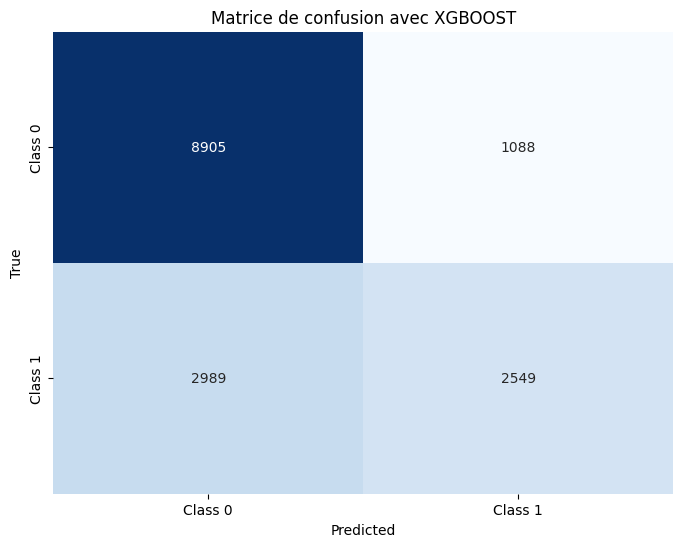

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      9993
         1.0       0.70      0.46      0.56      5538

    accuracy                           0.74     15531
   macro avg       0.72      0.68      0.68     15531
weighted avg       0.73      0.74      0.72     15531



In [ ]:
# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report_xgb = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy_xgb}")
conf_matrix4 = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de confusion avec XGBOOST')
plt.show()
print(f"Classification Report:\n{class_report_xgb}")


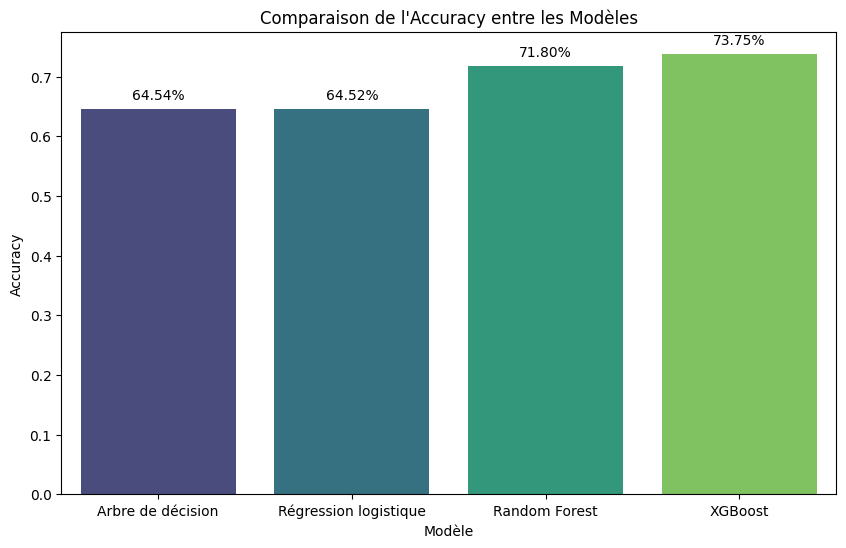

In [ ]:
accuracy_df = pd.DataFrame({
    'Modèle': ['Arbre de décision', 'Régression logistique', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_arbre, accuracy_logistic, accuracy_rf, accuracy_xgb]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Modèle', y='Accuracy', data=accuracy_df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.title('Comparaison de l\'Accuracy entre les Modèles')
plt.ylabel('Accuracy')
plt.show()


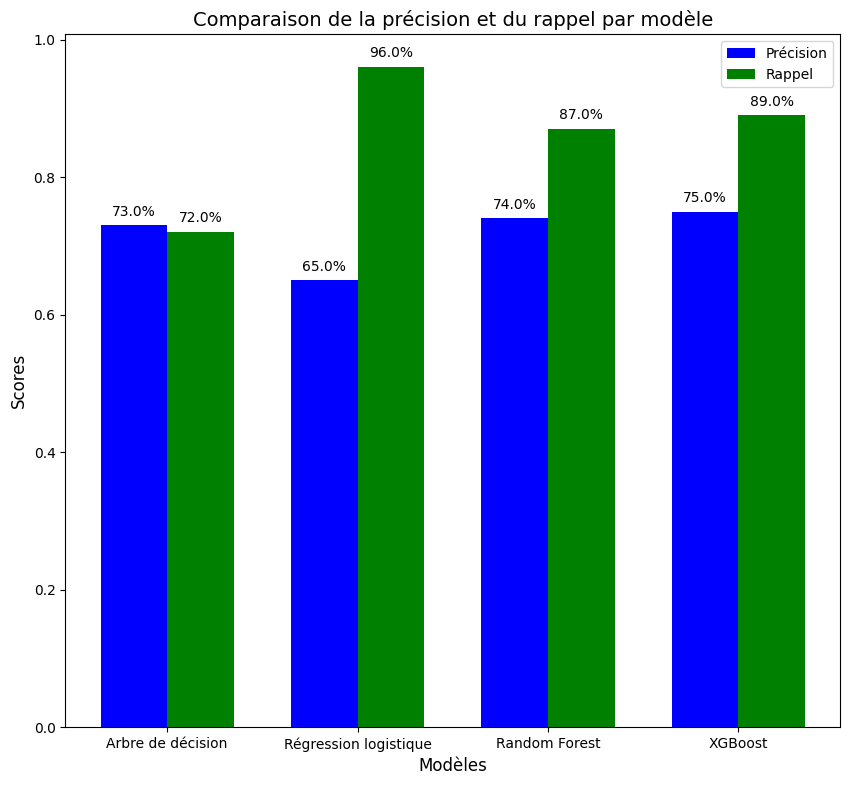

In [ ]:
modeles = ['Arbre de décision', 'Régression logistique', 'Random Forest', 'XGBoost']
precision = [0.73, 0.65, 0.74, 0.75]
rappel = [0.72, 0.96, 0.87, 0.89]

precision_percent = [p * 100 for p in precision]
rappel_percent = [r * 100 for r in rappel]

bar_width = 0.35
index = np.arange(len(modeles))


plt.figure(figsize=(10, 9))

# Barres pour la précision
bar1 = plt.bar(index, precision, color='blue', width=bar_width, label='Précision')

# Barres pour le rappel
bar2 = plt.bar(index + bar_width, rappel, color='green', width=bar_width, label='Rappel')

# Ajout des pourcentages au-dessus des barres
for bar, data in zip([bar1, bar2], [precision_percent, rappel_percent]):
    for rect, label in zip(bar, data):
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.01,  # ajustez cette valeur pour positionner le texte
            f'{label:.1f}%',
            ha='center',
            va='bottom'
        )

# Paramètres du graphique
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparaison de la précision et du rappel par modèle', fontsize=14)
plt.xticks(index + bar_width / 2, modeles)
plt.legend()

# Affichage du graphique
plt.show()


# Section 7: Explicabilité <a name="section-7"></a>

Utilisation des méthodes d'explicabilité pour générer des explication sur les prédictions du dernier modèle (XGBoost)

## Lime <a name="section-7-1"></a>

Utilisation de la méthode d'explicabilité LIME pour générer des explications locales

In [ ]:

explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features.columns, class_names=[str(x) for x in xgb_model.classes_], discretize_continuous=True)

instance_idx = 7  # Remplacer avec l'indice de l'instance qu'on veut expliquer
instance = X_test.iloc[instance_idx]

exp = explainer.explain_instance(instance.values, xgb_model.predict_proba, num_features=len(features.columns))

exp.show_in_notebook(show_all=False)

## Shap <a name="section-7-2"></a>

Générer des explications globales avec la méthode d'explicabilité Shap

In [ ]:

explainer = shap.Explainer(xgb_model)

shap_values = explainer.shap_values(X_test)


[01:36:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[01:36:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


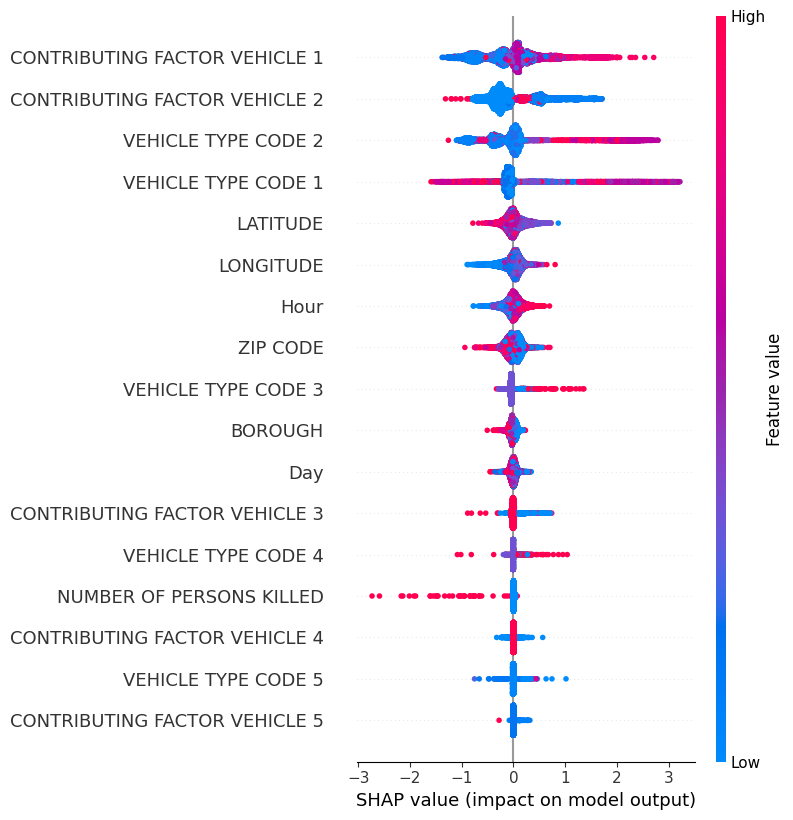

In [ ]:
shap.summary_plot(shap_values, X_test)


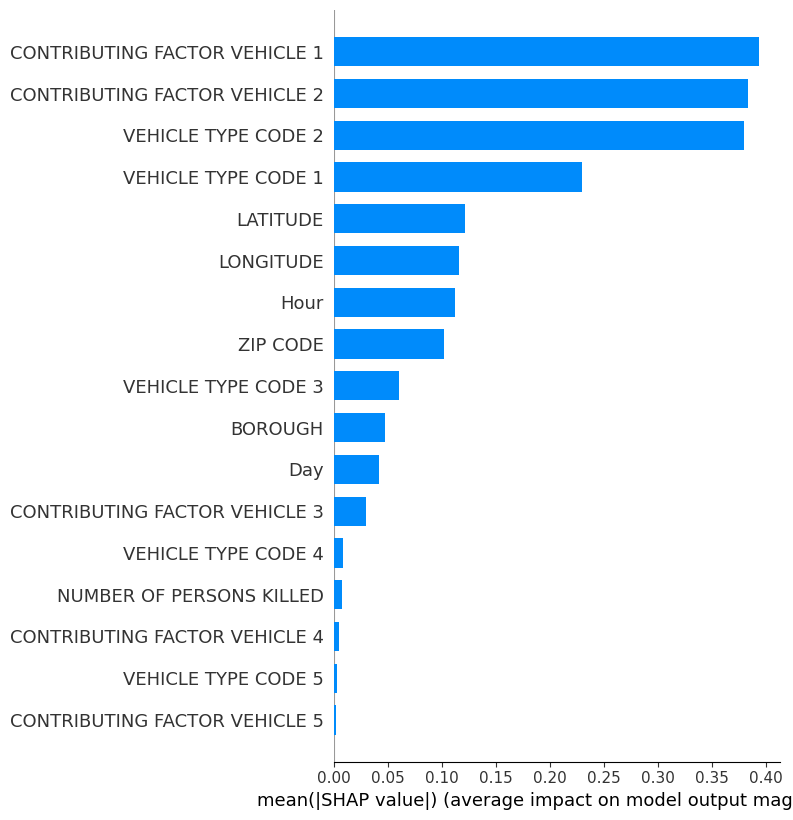

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
